# Group Project

In [19]:
#Here is where I import all the libraries
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [20]:
#here is my step 1
def oscillatory_function(x, amplitude, frequency, phase, offset):
    """
    Oscillatory function to describe the intra- and inter-day variations in tide.

    Parameters:
    x (array_like): Independent variable (day of the year). 
    amplitude (float): Amplitude of the oscillataion.
    frequency (float): Frequency of oscillation.
    phase (float): Phase shift of the oscillation.
    offset (float): Vertical offset of the oscillation.

    Returns:
        array_like: Values of the oscillatory function evaluated at x.
    """
    return amplitude * np.sin(2 * np.pi * frequency * x + phase) + offset

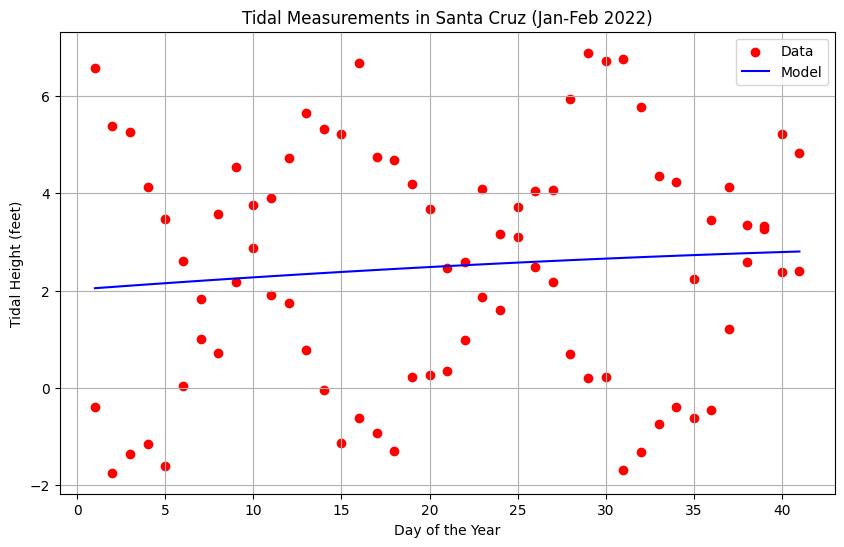

In [21]:
#here is my step 2
#Column 1 is day
#Column 2 is time
#Column 3 is tide in ft
data = """
 1  8:07  6.57
 1 15:37 -0.39
 2  8:55  5.38
 2 16:25 -1.74
 3  9:45  5.26
 3 17:14 -1.36
 4 10:35  4.13
 4 18:00 -1.15
 5 11:28  3.48
 5 18:46 -1.61
 6 12:22  2.62
 6 19:31  0.05
 7 13:24  1.83
 7 20:16  1.01
 8  3:22  3.57
 8 21:01  0.73
 9  4:07  4.54
 9 21:46  2.17
10  4:50  3.76
10 11:58  2.88
11  5:31  3.90
11 12:56  1.92
12  6:08  4.73
12 13:45  1.74
13  6:47  5.66
13 14:25  0.79
14  7:22  5.33
14 15:00 -0.04
15  7:59  5.23
15 15:34 -1.12
16  8:34  6.67
16 16:08 -0.61
17  9:10  4.74
17 16:41 -0.93
18  9:45  4.69
18 17:12 -1.29
19 10:21  4.20
19 17:45  0.22
20 10:57  3.68
20 18:15  0.26
21 11:38  2.47
21 18:48  0.36
22 12:25  2.59
22 19:20  0.99
23  2:22  4.10
23 19:52  1.87
24  2:58  3.17
24 20:30  1.60
25  3:37  3.71
25 10:44  3.10
26  4:23  4.04
26 11:55  2.49
27  5:15  4.07
27 12:57  2.18
28  6:09  5.93
28 13:50  0.70
29  7:05  6.89
29 14:39  0.21
30  7:58  6.72
30 15:27  0.22
31  8:50  6.77
31 16:10 -1.68
32  9:40  5.77
32 16:52 -1.32
33 10:30  4.35
33 17:34 -0.73
34 11:19  4.23
34 18:12 -0.38
35 12:10  2.24
35 18:49 -0.61
36  1:32  3.45
36 19:24 -0.46
37  2:13  4.13
37 20:00  1.21
38  2:54  3.34
38  9:54  2.58
39  3:39  3.32
39 11:15  3.26
40  4:29  5.21
40 12:22  2.39
41  5:21  4.83
41 13:14  2.41
"""
data = [line.split() for line in data.split('\n') if line]
df = pd.DataFrame(data, columns=['Day', 'Time', 'Tide_Height'])
df['Day'] = pd.to_numeric(df['Day'])
df['Tide_Height'] = pd.to_numeric(df['Tide_Height'])
x_data = df['Day'].values
y_data = df['Tide_Height'].values

initial_guess = (5, 1/356, 0, 0)

popt, pcov = curve_fit(oscillatory_function, x_data, y_data, p0=initial_guess, sigma=0.25)
plt.figure(figsize=(10, 6))
plt.scatter(df['Day'], df['Tide_Height'], label='Data', color='red')
plt.plot(df['Day'], oscillatory_function(x_data, *popt), label='Model', color='blue')
plt.xlabel('Day of the Year')
plt.ylabel('Tidal Height (feet)')
plt.title('Tidal Measurements in Santa Cruz (Jan-Feb 2022)')
plt.legend()
plt.grid(True)

plt.savefig('model_data.pdf')
plt.show()

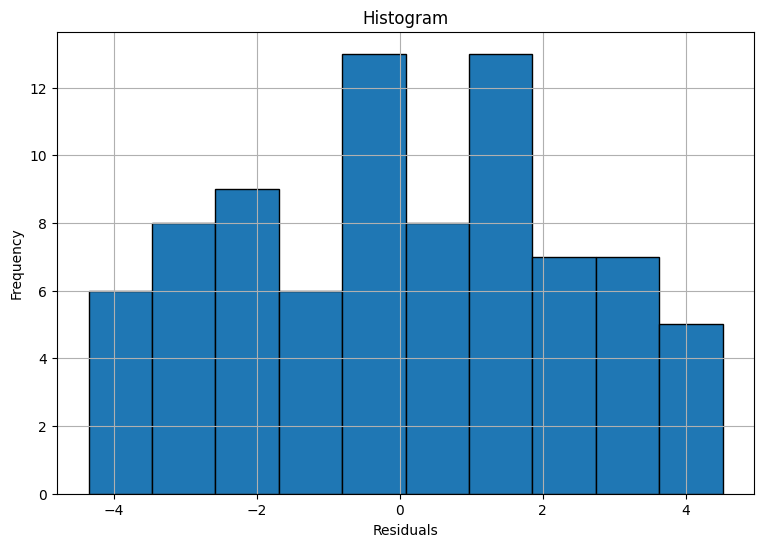

Standard deviation: 2.37 feet


In [22]:
# Here is step 3
residuals = y_data - oscillatory_function(x_data, *popt)
plt.figure(figsize=(9, 6))
plt.hist(residuals, bins=10, edgecolor='Black', alpha=1)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.savefig('residuals_histogram.pdf')

plt.show()

residuals_std = np.std(residuals)
print(f"Standard deviation: {residuals_std:.2f} feet")

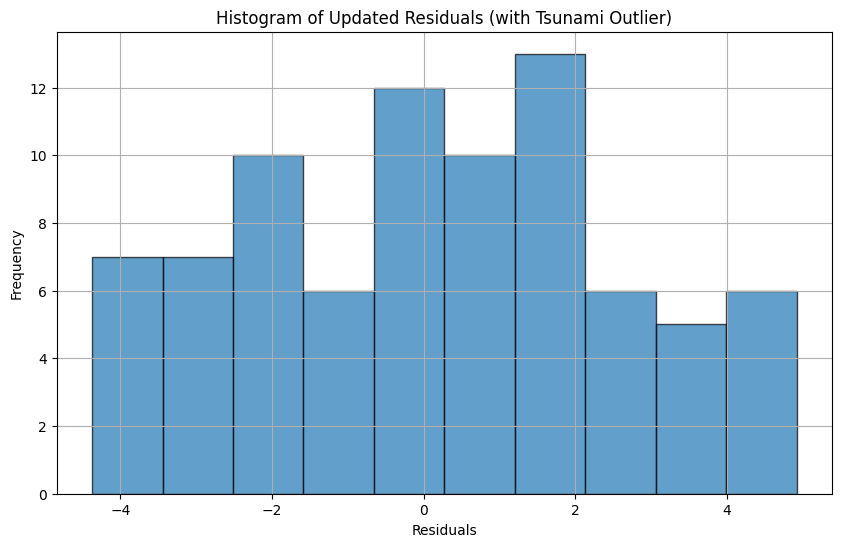

In [23]:
#Here is step 4
index_jan_14 = df[df['Day'] == 14].index[0]
df.at[index_jan_14, 'Tide_Height'] += 2
x_data = df['Day'].values
y_data = df['Tide_Height'].values
popt, pcov = curve_fit(oscillatory_function, x_data, y_data, p0=initial_guess, sigma=0.25)

residuals_updated = y_data - oscillatory_function(x_data, *popt)


plt.figure(figsize=(10, 6))
plt.hist(residuals_updated, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Updated Residuals (with Tsunami Outlier)')
plt.grid(True)


plt.savefig('updated_residuals_histogram.pdf')

plt.show()
